# A/B/C Testing Analysis: Fast Food Marketing Campaign Performance
## Statistical Analysis of Three Marketing Promotions
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal, levene, shapiro, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
df = pd.read_csv('WA_Marketing-Campaign.csv')

print("Data Overview")
print("-------------------")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"\nColumns: {list(df.columns)}")
display(df.head())

print("\nBasic Statistics")
print("-------------------")
display(df.describe())

print("\nPromotion Data")
print("-------------------")
display(df['Promotion'].value_counts())

print("\nMissing Values")
print("-------------------")
display(df.isnull().sum())

Data Overview
-------------------
Rows: 548, Columns: 7

Columns: ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81



Basic Statistics
-------------------


,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000



Promotion Data
-------------------


Promotion
3    188
2    188
1    172
Name: count, dtype: int64


Missing Values
-------------------


MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['marketid', 'marketsize', 'locationid', 'ageofstore', 'promotion',
       'week', 'salesinthousands'],
      dtype='object')

### Overview:
- Initially, the dataset looks solid with clear variables and no missing data.
- The "promotion" type is the main variable that this A/B/C test will cover.
- The "salesinthousands" will be the dependent variable, while the other variables will be independent.

---

Sales Summary by Promotion
--------------------------


,count,mean,median,std
promotion,,,,
1,172,58.10,55.39,16.55
2,188,47.33,45.39,15.11
3,188,55.36,51.16,16.77


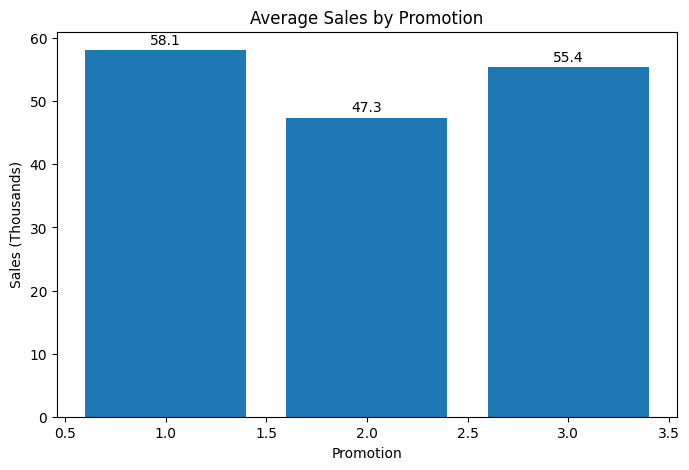

<Figure size 800x500 with 0 Axes>

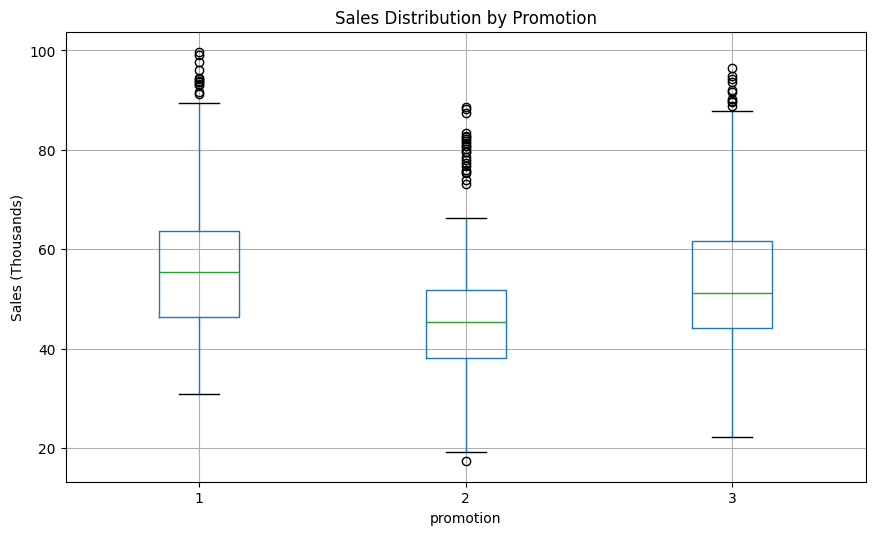


Which Promostion is the Best?
-------------------------------
Average sales by promotion:
1: 58.1k (+8.7% vs overall average)
2: 47.3k (-11.5% vs overall average)
3: 55.4k (+3.6% vs overall average)

Best performing: 1 (58.1k)
Worst performing: 2 (47.3k)
Performance gap: 10.8k (22.8% difference)


In [ ]:
# Basic stats for each promotion
summary_stats = df.groupby('promotion')['salesinthousands'].agg(['count', 'mean', 'median', 'std']).round(2)

print("Sales Summary by Promotion")
print("--------------------------")
display(summary_stats)
print('\n')

# Bar chart of sales in average
avg_sales = df.groupby('promotion')['salesinthousands'].mean()
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_sales.index, avg_sales.values)
plt.title('Average Sales by Promotion')
plt.ylabel('Sales (Thousands)')
plt.xlabel('Promotion')
# Value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}', ha='center', va='bottom')
plt.show()

# Box-plot comparison
plt.figure(figsize=(8, 5))
df.boxplot(column='salesinthousands', by='promotion')
plt.title('Sales Distribution by Promotion')
plt.suptitle('')  # to remove the automatic title
plt.ylabel('Sales (Thousands)')
plt.show()


print("\nWhich Promostion is the Best?")
print("-------------------------------")
promotion_means = df.groupby('promotion')['salesinthousands'].mean()
overall_mean = df['salesinthousands'].mean()

print("Average sales by promotion:")
for promo in promotion_means.index:
    mean_val = promotion_means[promo]
    diff_from_overall = mean_val - overall_mean
    percent_diff = (diff_from_overall / overall_mean) * 100
    print(f"{promo}: {mean_val:.1f}k ({percent_diff:+.1f}% vs overall average)")

# Best and worst performing
best_promo = promotion_means.idxmax()
worst_promo = promotion_means.idxmin()
performance_gap = promotion_means[best_promo] - promotion_means[worst_promo]

print(f"\nBest performing: {best_promo} ({promotion_means[best_promo]:.1f}k)")
print(f"Worst performing: {worst_promo} ({promotion_means[worst_promo]:.1f}k)")
print(f"Performance gap: {performance_gap:.1f}k ({(performance_gap/promotion_means[worst_promo]*100):.1f}% difference)")


### Overview:
- Promotion 1 has the highest sales on average.
- Promotion 2 has lower mean (47.33) and median (45.39) sales compared to Promotions 1 and 3.
- Based on the Box-plots, there are some outliers in each promotion category.


#### This analysis will be rerun after removing the outliers according to the Box-plot resutls:

Sales Summary by Promotion (Outliers Removed)
---------------------------------------------


,count,mean,median,std
promotion,,,,
1,160,55.35,54.82,13.59
2,164,42.91,44.30,9.06
3,178,53.30,50.97,14.69


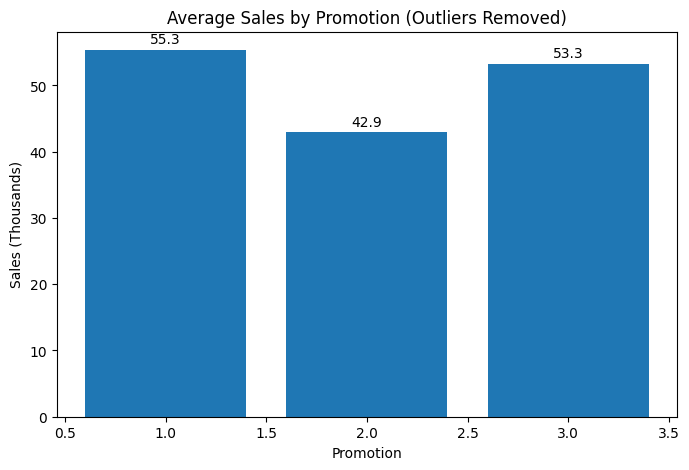

<Figure size 800x500 with 0 Axes>

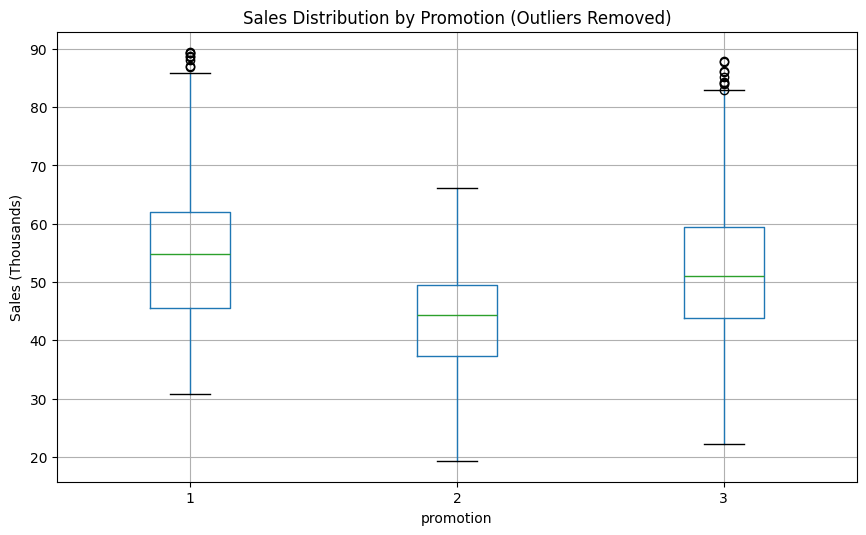


Which Promotion is the Best? (Outliers Removed)
-----------------------------------------------
Average sales by promotion:
1: 55.3k (+9.5% vs overall average)
2: 42.9k (-15.1% vs overall average)
3: 53.3k (+5.4% vs overall average)

Best performing: 1 (55.3k)
Worst performing: 2 (42.9k)
Performance gap: 12.4k (29.0% difference)


In [ ]:
# Removing the outliers using the IQR method
def remove_outliers_iqr(group):
    Q1 = group['salesinthousands'].quantile(0.25)
    Q3 = group['salesinthousands'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['salesinthousands'] >= lower) & (group['salesinthousands'] <= upper)]

df_no_outliers = df.groupby('promotion', group_keys=False).apply(remove_outliers_iqr)


# Rerunning the codes above
summary_stats = df_no_outliers.groupby('promotion')['salesinthousands'].agg(['count', 'mean', 'median', 'std']).round(2)

print("Sales Summary by Promotion (Outliers Removed)")
print("---------------------------------------------")
display(summary_stats)
print('\n')

avg_sales = df_no_outliers.groupby('promotion')['salesinthousands'].mean()
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_sales.index, avg_sales.values)
plt.title('Average Sales by Promotion (Outliers Removed)')
plt.ylabel('Sales (Thousands)')
plt.xlabel('Promotion')
# Value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}', ha='center', va='bottom')
plt.show()

plt.figure(figsize=(8, 5))
df_no_outliers.boxplot(column='salesinthousands', by='promotion')
plt.title('Sales Distribution by Promotion (Outliers Removed)')
plt.suptitle('')
plt.ylabel('Sales (Thousands)')
plt.show()

print("\nWhich Promotion is the Best? (Outliers Removed)")
print("-----------------------------------------------")
promotion_means = df_no_outliers.groupby('promotion')['salesinthousands'].mean()
overall_mean = df_no_outliers['salesinthousands'].mean()

print("Average sales by promotion:")
for promo in promotion_means.index:
    mean_val = promotion_means[promo]
    diff_from_overall = mean_val - overall_mean
    percent_diff = (diff_from_overall / overall_mean) * 100
    print(f"{promo}: {mean_val:.1f}k ({percent_diff:+.1f}% vs overall average)")

best_promo = promotion_means.idxmax()
worst_promo = promotion_means.idxmin()
performance_gap = promotion_means[best_promo] - promotion_means[worst_promo]

print(f"\nBest performing: {best_promo} ({promotion_means[best_promo]:.1f}k)")
print(f"Worst performing: {worst_promo} ({promotion_means[worst_promo]:.1f}k)")
print(f"Performance gap: {performance_gap:.1f}k ({(performance_gap/promotion_means[worst_promo]*100):.1f}% difference)")


### After removing the outliers:
- Promotion 1 has the highest sales on average.
- Promotion 2 has lower mean (42.91) and median (44.30) sales compared to Promotions 1 and 3.
- The results still look similar to the first analysis, so the outliers did not make much difference.
- Therefore, removing the outliers is subjectively ignored, as they did not change the conclusion.

---

In [ ]:
print("Testing Statistical Assumptions for ANOVA")
print("-----------------------------------------\n")

# Data for each promotion
promo_1 = df[df['promotion'] == df['promotion'].unique()[0]]['salesinthousands']
promo_2 = df[df['promotion'] == df['promotion'].unique()[1]]['salesinthousands']
promo_3 = df[df['promotion'] == df['promotion'].unique()[2]]['salesinthousands']

promotion_data = [promo_1, promo_2, promo_3]
promotion_names = df['promotion'].unique()

# Test 1st assumption: Are the data normally distributed?
print("1. Testing if data is normally distributed\n")
normal_test_results = []
for i, promo in enumerate(promotion_names):
    stat, p_value = shapiro(promotion_data[i])
    is_normal = "Normally distributed." if p_value > 0.05 else "Not normally distributed."
    normal_test_results.append(is_normal)
    print(f"{promo}: p-value = {p_value:.4f} - {is_normal}")
print("\n------------------------------------------\n")

# Test 2nd assumption: Do groups have equal variance?
print("2. Testing if groups have equal variance\n")
levene_stat, levene_p = levene(*promotion_data)
equal_variance = "Groups have equal variance." if levene_p > 0.05 else "Groups do not have equal variance."
print(f"{equal_variance} (p-value = {levene_p:.4f})")
print("\n------------------------------------------")

Testing Statistical Assumptions for ANOVA
-----------------------------------------

1. Testing if data is normally distributed

3: p-value = 0.0000 - Not normally distributed.
2: p-value = 0.0000 - Not normally distributed.
1: p-value = 0.0000 - Not normally distributed.

------------------------------------------

2. Testing if groups have equal variance

Groups have equal variance. (p-value = 0.2818)

------------------------------------------


### The statistical assumptions for ANOVA are not satisfied.
- The data is not normally distributed.
- The categoriess have equal variance.

Therefore, we should take a non-parametric approach and use the Kruskal-Wallis test instead of the ANOVA test.

---

In [ ]:
print("\nKruskal-Wallis Test Results")
print("-----------------------------")

# Kruskal-Wallis test results
kruskal_stat, kruskal_p = kruskal(*promotion_data)
print(f"H-statistic: {kruskal_stat:.3f}")
print(f"p-value: {kruskal_p:.4f}")
if kruskal_p < 0.05:
    print("Result: Significant difference between promotions")
else:
    print("Result: No significant difference between promotions")


Kruskal-Wallis Test Results
-----------------------------
H-statistic: 53.295
p-value: 0.0000
Result: Significant difference between promotions


In [ ]:
print("\nPairwise Comparisons - Which specific promotions are different?")
print("-----------------------------------------------------------------")
    
# Compare each pair of promotions
comparisons = []
for i in range(len(promotion_names)):
    for j in range(i+1, len(promotion_names)):
        # Use Mann-Whitney U test for the pairwise comparison
        stat, p_val = mannwhitneyu(promotion_data[i], promotion_data[j], alternative='two-sided')    
        # Apply simple correction for multiple comparisons
        corrected_alpha = 0.05 / 3  # 3 pairwise comparisons
        is_significant = p_val < corrected_alpha
        
        comparison_name = f"{promotion_names[i]} vs {promotion_names[j]}"
        comparisons.append({'Comparison': comparison_name, 'p-value': p_val, 'Significant': is_significant})
        significance_text = "Significant" if is_significant else "Not significant"
        print(f"{comparison_name}: p = {p_val:.4f} - {significance_text}")
    
print(f"\nNote: Using corrected significance level of {corrected_alpha:.3f}")


Pairwise Comparisons - Which specific promotions are different?
-----------------------------------------------------------------
3 vs 2: p = 0.0000 - Significant
3 vs 1: p = 0.0351 - Not significant
2 vs 1: p = 0.0000 - Significant

Note: Using corrected significance level of 0.017


### Kruskal-Wallis Test & Pairwise Comparisons Results

The Kruskal-Wallis test showed a significant overall difference between the promotions.

To identify which specific promotions differed, pairwise comparisons were used. And showed that Promotion 2 differs significantly from both Promotion 1 and Promotion 3, while there was no significant difference between Promotion 1 and Promotion 3.

---

Sales trends over 4 weeks:


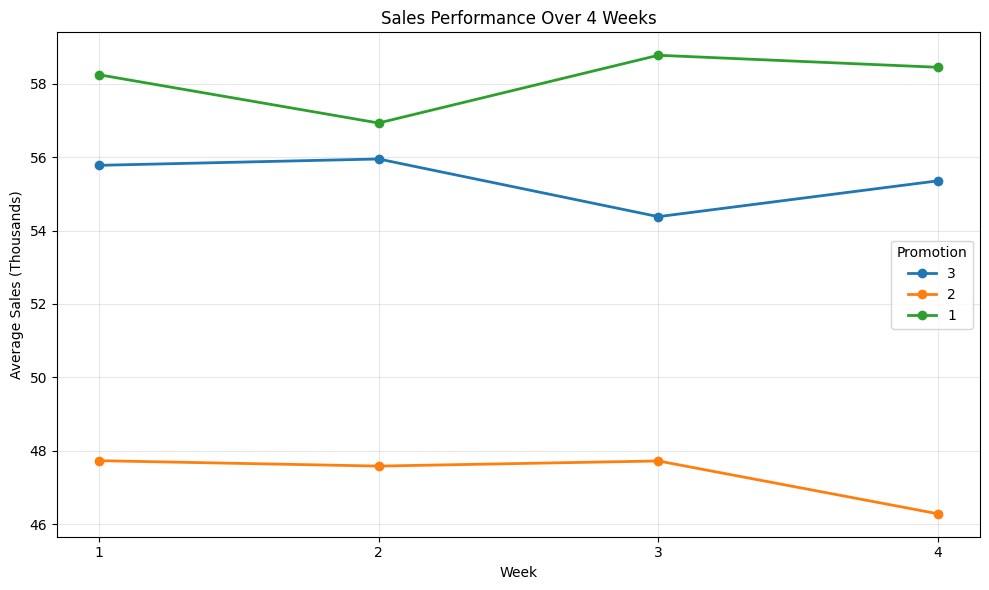


Average sales by market size and promotion:
marketsize  promotion
Large       1            75.235893
            2            60.322031
            3            77.203958
Medium      1            47.672604
            2            39.114352
            3            45.468879
Small       1            60.162500
            2            50.810625
            3            59.514167
Name: salesinthousands, dtype: float64


In [ ]:
# Analyzing the average sales performance over 4 weeks for each promotion
print("Sales trends over 4 weeks:")
weekly_performance = df.groupby(['week', 'promotion'])['salesinthousands'].mean()

plt.figure(figsize=(10, 6))
weeks = [1, 2, 3, 4]
for promo in promotion_names:
    sales = [weekly_performance[week, promo] for week in weeks]
    plt.plot(weeks, sales, marker='o', label=promo, linewidth=2)
plt.title('Sales Performance Over 4 Weeks')
plt.xlabel('Week')
plt.ylabel('Average Sales (Thousands)')
plt.xticks(weeks)
plt.legend(title='Promotion')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyzing the performance by the market size
print("\nAverage sales by market size and promotion:")
market_performance = df.groupby(['marketsize', 'promotion'])['salesinthousands'].mean()
print(market_performance)


### Overview:

##### Weekly Sales Performance by Promotion
- The line chart shows that Promotion 1 consistently achieved the highest average sales each week, staying above 57K.
- Promotion 3 also performed well with stable results around 55–56K.
- Promotion 2 had the lowest sales across all weeks, with a clear drop in Week 4.


##### Average Sales by Market Size and Promotion
- In large markets, Promotion 3 slightly outperforms Promotion 1, both far ahead of Promotion 2.
- In medium and small markets, Promotion 1 performs best.
- Promotion 2 consistently has the lowest sales across all market sizes.


##### Age of Store
The effect of store age on sales was examined, but it had no significant relationship.

---

### Final Summary and Recommendations

#### Summary of Findings:
- Promotion 1 consistently outperforms the others in average sales across weeks and market sizes.
- Promotion 3 performs similarly well, especially in large markets.
- Promotion 2 consistently underperforms in all comparisons.
- Outliers had minimal effect on the overall conclusions and were not removed from the final analysis.
- Statistical assumptions for ANOVA were violated, leading to the use of Kruskal-Wallis test.
- The Kruskal-Wallis test confirmed significant differences between promotions, especially showing that Promotion 2 differs significantly from the others.
- Market size influences results, with Promotions 1 and 3 excelling in large markets.
- Store age has no significant effect on sales performance.



#### Recommendations:
- Stop using Promotion 2 (Its underperformance shows that it's not effective.)
- Prioritize Promotion 1 (It showed stronger results across all market types.)
- Use Promotion 3 in large urban markets (It slightly outperforms Promotion 1 in these areas.)

---